In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset (update the filename to your downloaded file)
df = pd.read_csv('Unemployment in India.csv')

# Quick look at the first few rows
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [3]:
# 1. Strip extra spaces from column names
df.columns = df.columns.str.strip()

# 2. Convert 'Date' column to datetime format
# Note: dayfirst=True is often needed for Indian date formats (DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 3. Drop rows with missing values (common in the footer of CSVs)
df.dropna(inplace=True)

# 4. Extract Month and Year for easier seasonal analysis
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
 7   Month                                    740 non-null    object        
 8   Year                                     740 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), objec

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_11980\1658182192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis')


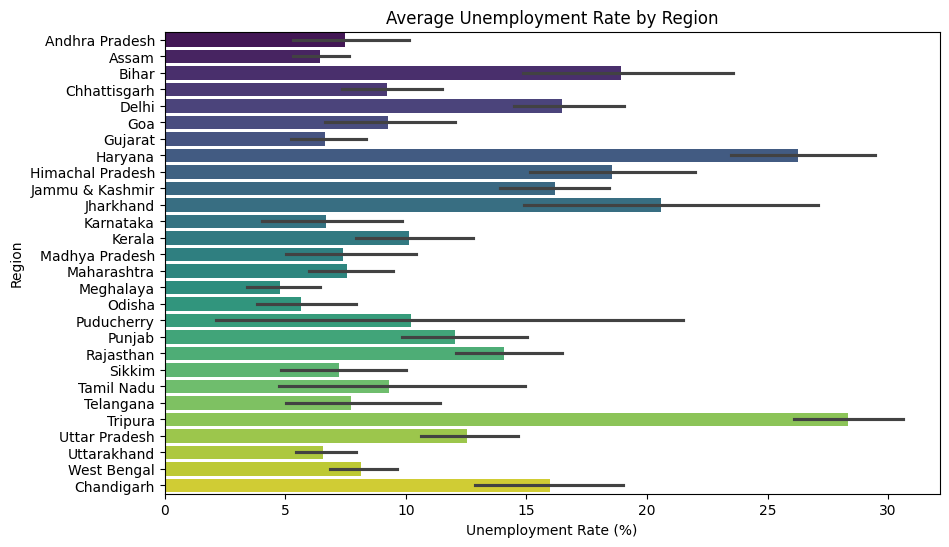

In [4]:
# Regional Unemployment Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.show()

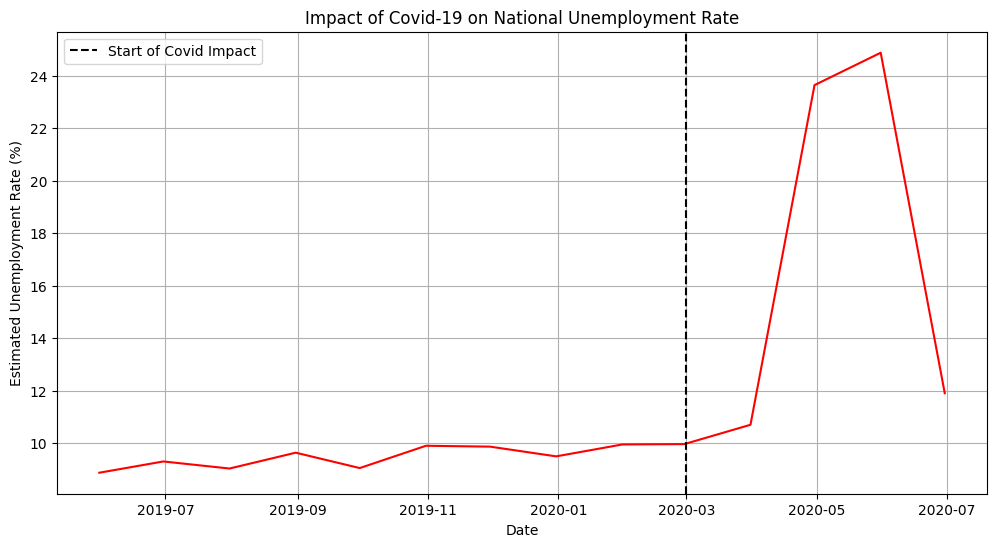

In [5]:
# Grouping by date to get a national average trend
national_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=national_trend, color='red')

# Add a vertical line to indicate the start of the pandemic impact (March 2020)
plt.axvline(pd.Timestamp('2020-03-01'), color='black', linestyle='--', label='Start of Covid Impact')

plt.title('Impact of Covid-19 on National Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

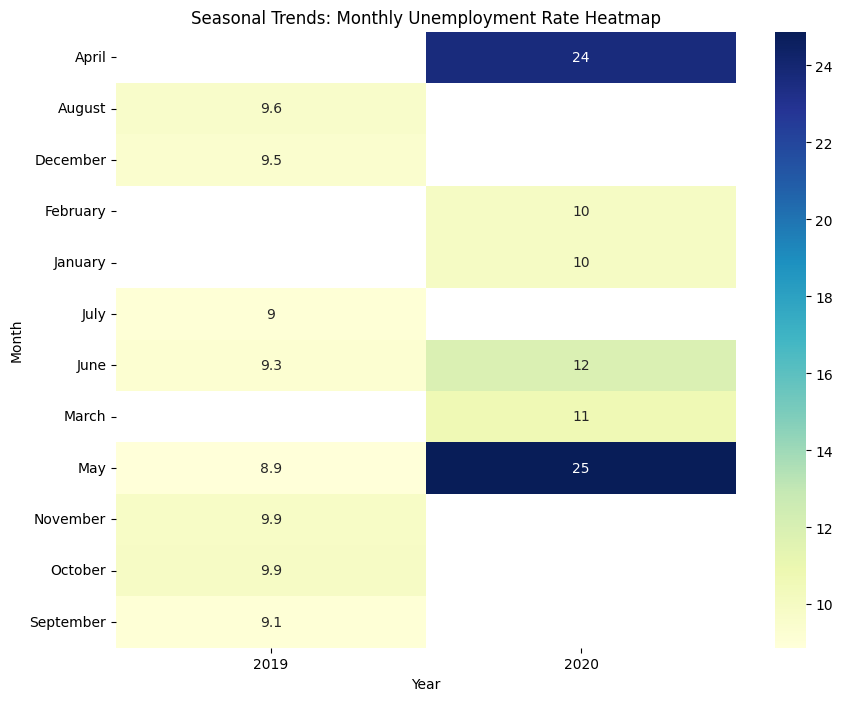

In [6]:
# Visualizing seasonal trends using a Heatmap
pivot_table = df.pivot_table(values='Estimated Unemployment Rate (%)', 
                             index='Month', 
                             columns='Year', 
                             aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Seasonal Trends: Monthly Unemployment Rate Heatmap')
plt.show()